In [1]:
import cenpy
import osmnx
import contextily
import networkx as nx
import pandas as pd
import pickle
import geopandas
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [2]:
%load_ext autoreload
%autoreload 2
import dem_functions as df
import bikeability_functions as bf

In [3]:
plt.style.use('seaborn')

C:\Users\kyan3\AppData\Local\Temp\ipykernel_9892\240305066.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



## San Francisco

In [33]:
G_SF = bf.load_graph('data/V2_SF_coarse_graph_cluster',discomfort_scale='linear')
G_inc_SF = bf.load_graph('data/V2_SF_coarse_graph_cluster',discomfort_scale='threshold')

In [34]:
betas=np.linspace(0.01,10,200)

In [35]:
curves_SF = bf.compute_bikeability_curves(G_SF,G_SF.nodes(),dest='all')
user_dict_SF = bf.network_wide_bikeability_curve(betas, curves_SF)

curves_inc_SF = bf.compute_bikeability_curves(G_inc_SF,G_inc_SF.nodes(),dest='all')
user_dict_inc_SF = bf.network_wide_bikeability_curve(betas, curves_inc_SF)

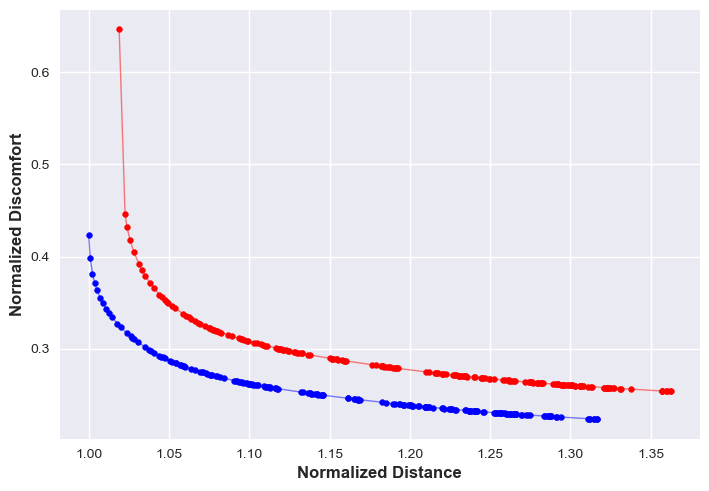

In [37]:
fig,ax=plt.subplots()
ax.plot(np.array([data[1] for _,data in user_dict_SF.items()]),
                 np.array([data[2] for _,data in user_dict_SF.items()]),linewidth=1,color='blue',alpha=0.5)
ax.scatter(np.array([data[1] for _,data in user_dict_SF.items()]),
                 np.array([data[2] for _,data in user_dict_SF.items()]),s=18,c='blue')

ax.plot(np.array([data[1] for _,data in user_dict_inc_SF.items()]),
                 np.array([data[2] for _,data in user_dict_inc_SF.items()]),linewidth=1,color='red',alpha=0.5)
ax.scatter(np.array([data[1] for _,data in user_dict_inc_SF.items()]),
                 np.array([data[2] for _,data in user_dict_inc_SF.items()]),s=18,c='red')

ax.set_xlabel('Normalized Distance',fontsize=12,fontweight='semibold')
ax.set_ylabel('Normalized Discomfort',fontsize=12,fontweight='semibold')
plt.subplots_adjust(bottom=0.1,left=0.1)
#ax.set_ylim([0.21,0.43])
#ax.set_xlim([0.975,1.4])

## Philadelphia

In [38]:
G_Philly = bf.load_graph('data/V2_Philly_coarse_graph_cluster',discomfort_scale='linear')
G_inc_Philly = bf.load_graph('data/V2_Philly_coarse_graph_cluster',discomfort_scale='threshold')

In [48]:
betas=np.linspace(0.01,10,200)

In [40]:
curves_Philly = bf.compute_bikeability_curves(G_Philly,G_Philly.nodes(),dest='all')
user_dict_Philly = bf.network_wide_bikeability_curve(betas, curves_Philly)

curves_inc_Philly = bf.compute_bikeability_curves(G_inc_Philly,G_inc_Philly.nodes(),dest='all')
user_dict_inc_Philly = bf.network_wide_bikeability_curve(betas, curves_inc_Philly)

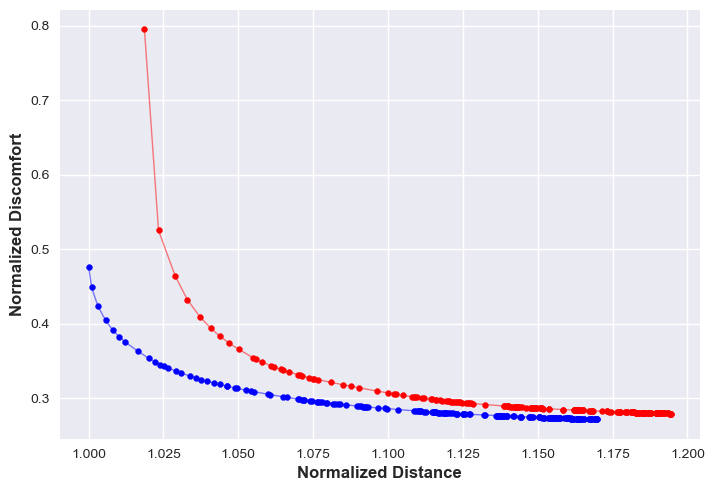

In [42]:
fig,ax=plt.subplots()
ax.plot(np.array([data[1] for _,data in user_dict_Philly.items()]),
                 np.array([data[2] for _,data in user_dict_Philly.items()]),linewidth=1,color='blue',alpha=0.5)
ax.scatter(np.array([data[1] for _,data in user_dict_Philly.items()]),
                 np.array([data[2] for _,data in user_dict_Philly.items()]),s=18,c='blue')

ax.plot(np.array([data[1] for _,data in user_dict_inc_Philly.items()]),
                 np.array([data[2] for _,data in user_dict_inc_Philly.items()]),linewidth=1,color='red',alpha=0.5)
ax.scatter(np.array([data[1] for _,data in user_dict_inc_Philly.items()]),
                 np.array([data[2] for _,data in user_dict_inc_Philly.items()]),s=18,c='red')

ax.set_xlabel('Normalized Distance',fontsize=12,fontweight='semibold')
ax.set_ylabel('Normalized Discomfort',fontsize=12,fontweight='semibold')
plt.subplots_adjust(bottom=0.1,left=0.1)
#ax.set_ylim([0.21,0.43])
#ax.set_xlim([0.975,1.4])

## Detroit

In [49]:
G_Detroit = bf.load_graph('data/V2_Detroit_coarse_graph_cluster',discomfort_scale='linear')
G_inc_Detroit = bf.load_graph('data/V2_Detroit_coarse_graph_cluster',discomfort_scale='threshold')

In [50]:
betas=np.linspace(0.01,10,200)

In [51]:
curves_Detroit = bf.compute_bikeability_curves(G_Detroit,G_Detroit.nodes(),dest='all')
user_dict_Detroit = bf.network_wide_bikeability_curve(betas, curves_Detroit)

curves_inc_Detroit = bf.compute_bikeability_curves(G_inc_Detroit,G_inc_Detroit.nodes(),dest='all')
user_dict_inc_Detroit = bf.network_wide_bikeability_curve(betas, curves_inc_Detroit)

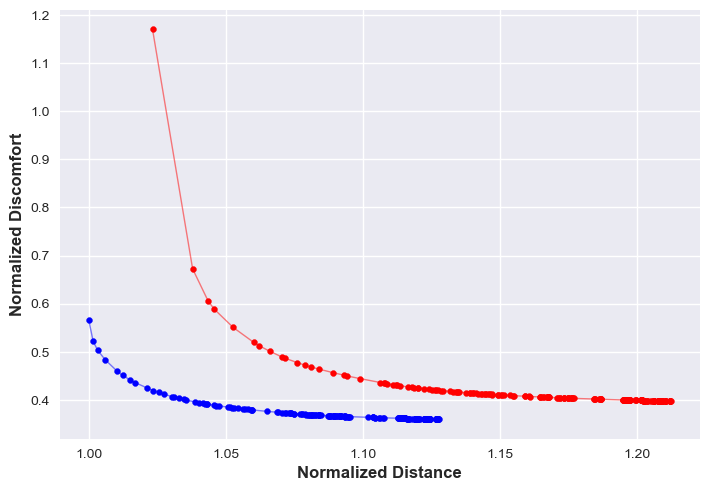

In [52]:
fig,ax=plt.subplots()
ax.plot(np.array([data[1] for _,data in user_dict_Detroit.items()]),
                 np.array([data[2] for _,data in user_dict_Detroit.items()]),linewidth=1,color='blue',alpha=0.5)
ax.scatter(np.array([data[1] for _,data in user_dict_Detroit.items()]),
                 np.array([data[2] for _,data in user_dict_Detroit.items()]),s=18,c='blue')

ax.plot(np.array([data[1] for _,data in user_dict_inc_Detroit.items()]),
                 np.array([data[2] for _,data in user_dict_inc_Detroit.items()]),linewidth=1,color='red',alpha=0.5)
ax.scatter(np.array([data[1] for _,data in user_dict_inc_Detroit.items()]),
                 np.array([data[2] for _,data in user_dict_inc_Detroit.items()]),s=18,c='red')

ax.set_xlabel('Normalized Distance',fontsize=12,fontweight='semibold')
ax.set_ylabel('Normalized Discomfort',fontsize=12,fontweight='semibold')
plt.subplots_adjust(bottom=0.1,left=0.1)
#ax.set_ylim([0.21,0.43])
#ax.set_xlim([0.975,1.4])

## Plot all cities

In [74]:
def plot_city(user_dict,user_dict_inc,ax,title):
    line1, = ax.plot(np.array([data[1] for _,data in user_dict.items()]),
                 np.array([data[2] for _,data in user_dict.items()]),
                     linewidth=1,color='royalblue',alpha=0.5,label='Non-accessible')
    ax.scatter(np.array([data[1] for _,data in user_dict.items()]),
                     np.array([data[2] for _,data in user_dict.items()]),s=18,c='royalblue')

    line2, = ax.plot(np.array([data[1] for _,data in user_dict_inc.items()]),
                     np.array([data[2] for _,data in user_dict_inc.items()]),
                   linewidth=1,color='lightcoral',alpha=0.5,label='Accessible')
    ax.scatter(np.array([data[1] for _,data in user_dict_inc.items()]),
                     np.array([data[2] for _,data in user_dict_inc.items()]),s=18,c='lightcoral')

    #ax.set_ylim([0.2,1.2])
    #ax.set_xlim([0.975,1.375])
    ax.legend(handles=[line2,line1],frameon=True,facecolor='white')
    ax.set_xlabel('Normalized Distance',fontsize=12)
    ax.set_ylabel('Normalized Discomfort',fontsize=12)
    ax.set_title(title,fontsize=12,fontweight='semibold')

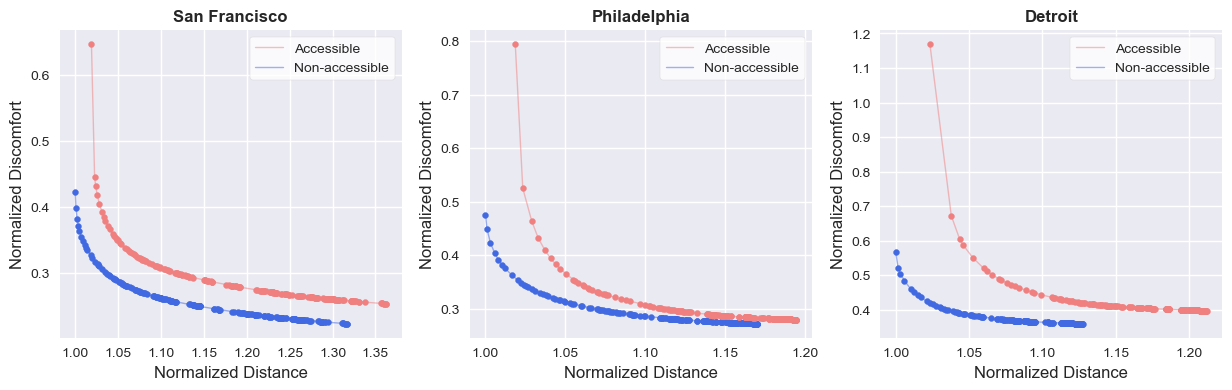

In [77]:
fig,axs=plt.subplots(ncols=3,figsize=(15,4))
plot_city(user_dict_SF,user_dict_inc_SF,axs[0],'San Francisco')
plot_city(user_dict_Philly,user_dict_inc_Philly,axs[1],'Philadelphia')
plot_city(user_dict_Detroit,user_dict_inc_Detroit,axs[2],'Detroit')
fig.savefig('figures/accessibility_equity.png',facecolor='white',dpi=300)

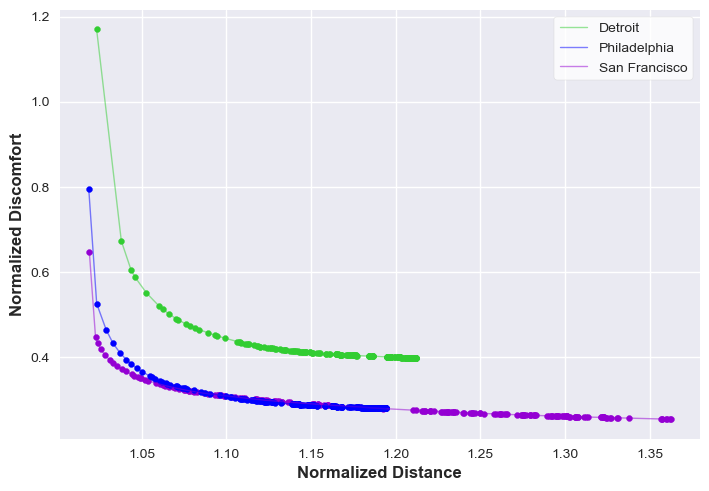

In [78]:
fig,ax=plt.subplots()
line1, = ax.plot(np.array([data[1] for _,data in user_dict_inc_SF.items()]),
                 np.array([data[2] for _,data in user_dict_inc_SF.items()]),
                linewidth=1,color='darkviolet',alpha=0.5,label='San Francisco')
ax.scatter(np.array([data[1] for _,data in user_dict_inc_SF.items()]),
                 np.array([data[2] for _,data in user_dict_inc_SF.items()]),s=18,c='darkviolet')

line2, =ax.plot(np.array([data[1] for _,data in user_dict_inc_Philly.items()]),
                 np.array([data[2] for _,data in user_dict_inc_Philly.items()]),
               linewidth=1,color='blue',alpha=0.5,label='Philadelphia')
ax.scatter(np.array([data[1] for _,data in user_dict_inc_Philly.items()]),
                 np.array([data[2] for _,data in user_dict_inc_Philly.items()]),s=18,c='blue')

line3, = ax.plot(np.array([data[1] for _,data in user_dict_inc_Detroit.items()]),
                 np.array([data[2] for _,data in user_dict_inc_Detroit.items()]),
                linewidth=1,color='limegreen',alpha=0.5,label='Detroit')
ax.scatter(np.array([data[1] for _,data in user_dict_inc_Detroit.items()]),
                 np.array([data[2] for _,data in user_dict_inc_Detroit.items()]),s=18,c='limegreen')

ax.legend(handles=[line3,line2,line1],frameon=True,facecolor='white')

ax.set_xlabel('Normalized Distance',fontsize=12,fontweight='semibold')
ax.set_ylabel('Normalized Discomfort',fontsize=12,fontweight='semibold')
plt.subplots_adjust(bottom=0.1,left=0.1)
fig.savefig('figures/accessibility_city_compare.png',facecolor='white',dpi=300)

## Calculate elbows

In [80]:
print('SAN FRANCISCO')
print('Accessibility no, yes: ',bf.calc_elbow(user_dict_SF),bf.calc_elbow(user_dict_inc_SF))
print('Ratio: ',bf.calc_elbow(user_dict_SF)/bf.calc_elbow(user_dict_inc_SF))

SAN FRANCISCO
Accessibility no, yes:  3.4818796818367885 2.9149174425904225
Ratio:  1.1945037039342423


In [81]:
print('PHILADELPHIA')
print('Accessibility no, yes: ',bf.calc_elbow(user_dict_Philly),bf.calc_elbow(user_dict_inc_Philly))
print('Ratio: ',bf.calc_elbow(user_dict_Philly)/bf.calc_elbow(user_dict_inc_Philly))

PHILADELPHIA
Accessibility no, yes:  3.0416040205323225 2.6535728710816104
Ratio:  1.146229694190591


In [82]:
print('DETROIT')
print('Accessibility no, yes: ',bf.calc_elbow(user_dict_Detroit),bf.calc_elbow(user_dict_inc_Detroit))
print('Ratio: ',bf.calc_elbow(user_dict_Detroit)/bf.calc_elbow(user_dict_inc_Detroit))

DETROIT
Accessibility no, yes:  2.4501304038820795 1.9112092687880529
Ratio:  1.281979134307867
